In [1]:
import os
import movingpandas as mpd
mpd.show_versions()
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta
from holoviews import opts

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))


MovingPandas 0.16.0

SYSTEM INFO
-----------
python     : 3.9.16 (main, May 15 2023, 23:46:34)  [GCC 11.2.0]
executable : /home/dmp/anaconda3/envs/ARPA-FCA_venv/bin/python
machine    : Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.7.0
GDAL data dir: /home/dmp/anaconda3/envs/ARPA-FCA_venv/lib/python3.9/site-packages/fiona/gdal_data
PROJ       : 9.2.1
PROJ data dir: /home/dmp/anaconda3/envs/ARPA-FCA_venv/lib/python3.9/site-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.2
pandas     : 1.5.3
fiona      : 1.9.4
numpy      : 1.24.3
shapely    : 2.0.1
rtree      : 1.0.1
pyproj     : 3.6.0
matplotlib : 3.7.1
mapclassify: 2.5.0
geopy      : 2.3.0
holoviews  : 1.16.2
hvplot     : 0.8.2
geoviews   : 1.10.0
stonesoup  : None


In [2]:
def load_data(filepath, filename):
    file = filepath + filename
    data = pd.read_csv(file)
    return data

cwd = os.getcwd()
data_path = cwd + '/Data/'
file_name = 'preprocessed_data_22_23.xlsx'

df = pd.read_excel(data_path + file_name)

In [3]:
df.shape

(9102, 14)

In [4]:
df.head()

Unnamed: 0  index file_source  node_sn           timestamp    GPS_lat  \
0           0    546    old_2022        1 2022-03-28 17:12:50  45.013988   
1           1    547    old_2022        1 2022-03-28 17:25:50  45.013870   
2           2    551    old_2022        1 2022-03-28 19:23:23  45.012569   
3           3    862    old_2022        1 2022-04-01 09:08:12  45.046070   
4           4    872    old_2022        1 2022-04-01 10:04:18  45.044682   

   GPS_lon  GPS_alt  GPS_speed  GPS_num_sats  temperature  batt_level  \
0  7.56788      275        0.0             4      25.8305         NaN   
1  7.56798      289        0.0             4      26.1349         NaN   
2  7.56539      111        0.0             3      21.1734         NaN   
3  7.64608      126        0.0             4      22.0813         NaN   
4  7.64688      284        0.0             5      22.3217         NaN   

        date      time  
0 2022-03-28  17:12:50  
1 2022-03-28  17:25:50  
2 2022-03-28  19:23:23  
3 2022-04-01  09:08:12  
4 2022-04-01  10:04:18

In [7]:
trucks_ids = list(df.node_sn.unique())
trucks_ids.sort()
print('All different truck IDs are: ' + str(trucks_ids))

main_traj_collection = mpd.TrajectoryCollection(df, 'node_sn', t='timestamp', x='GPS_lon', y='GPS_lat')
hvplot_defaults = {'tiles': 'OSM', 'frame_height': 550, 'frame_width': 550, 'line_width': 7.0}

All different truck IDs are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 24, 25, 26, 27]


# From preprocessed dataset, generate a traj_collection

In [10]:
traj_collection = mpd.TrajectoryCollection(df, 'node_sn', t='timestamp', x='GPS_lon', y='GPS_lat')
hvplot_defaults = {'tiles':'OSM', 'frame_height':550, 'frame_width':550, 'line_width':7.0}
traj_collection.hvplot(**hvplot_defaults)

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Path.I       :Path   [Longitude,Latitude]
   .Points.I     :Points   [Longitude,Latitude]   (triangle_angle)
   .Path.II      :Path   [Longitude,Latitude]
   .Points.II    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle)
   .Path.III     :Path   [Longitude,Latitude]
   .Points.III   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle)
   .Path.IV      :Path   [Longitude,Latitude]
   .Points.IV    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.V       :Path   [Longitude,Latitude]
   .Points.V     :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VI      :Path   [Longitude,Latitude]
   .Points.VI    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VII     :Path   [Longitude,Latitude]
   .Points.VII   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VIII    :Path   [Longitude,Latitude]
   .Points.VIII  :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.IX      :Path   [Longitude,Latitude]
   .Points.IX    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.X       :Path   [Longitude,Latitude]
   .Points.X     :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XI      :Path   [Longitude,Latitude]
   .Points.XI    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XII     :Path   [Longitude,Latitude]
   .Points.XII   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XIII    :Path   [Longitude,Latitude]
   .Points.XIII  :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XIV     :Path   [Longitude,Latitude]
   .Points.XIV   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XV      :Path   [Longitude,Latitude]
   .Points.XV    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XVI     :Path   [Longitude,Latitude]
   .Points.XVI   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.XVII    :Path   [Longitude,Latitude]
   .Points.XVII  :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle

# Stop detection with a single Trajectory

In [14]:
# for truck_id in trucks_ids:
truck_id = 24
print('truck ID considered is '+ str(truck_id))
my_traj = traj_collection.get_trajectory(truck_id)
print('route sampling interval is ' + str(my_traj.get_sampling_interval()))

truck ID considered is 24
route sampling interval is 0 days 00:17:21


In [32]:
traj_plot = my_traj.hvplot(title='Trajectory {}'.format(my_traj.id), line_width=7.0, tiles='CartoLight', color='blue')
traj_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [15]:
detector = mpd.TrajectoryStopDetector(my_traj)

                                         geometry          start_time  \
stop_id                                                                 
24_2023-02-03 17:20:44   POINT (7.51724 44.99072) 2023-02-03 17:20:44   
24_2023-02-17 10:40:48   POINT (7.63146 45.02812) 2023-02-17 10:40:48   
24_2023-02-21 19:28:11  POINT (10.13475 45.26922) 2023-02-21 19:28:11   
24_2023-02-22 15:46:32  POINT (17.38011 46.68406) 2023-02-22 15:46:32   
24_2023-03-02 17:29:04   POINT (7.51718 44.99072) 2023-03-02 17:29:04   
24_2023-03-31 08:12:37   POINT (7.60387 45.02320) 2023-03-31 08:12:37   
24_2023-04-01 11:56:25  POINT (13.26014 45.88147) 2023-04-01 11:56:25   
24_2023-04-03 15:16:03  POINT (19.05392 47.37889) 2023-04-03 15:16:03   
24_2023-04-04 07:06:43  POINT (19.26034 47.37276) 2023-04-04 07:06:43   

                                  end_time  traj_id  duration_s  
stop_id                                                          
24_2023-02-03 17:20:44 2023-02-17 09:52:28       24   1182704.0 

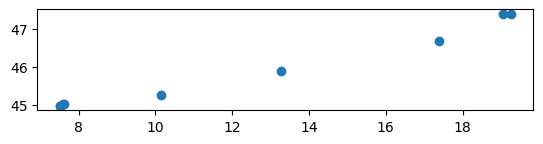

In [17]:
stops_points = detector.get_stop_points(min_duration=timedelta(hours=1), max_diameter=5000)
stops_points.plot()
print(stops_points)

In [33]:
stops_segments = detector.get_stop_segments(min_duration=timedelta(hours=1), max_diameter=5000)
print(stops_segments)
hvplot_defaults = {'tiles':'CartoLight', 'frame_height':550, 'frame_width':550, 'line_width':7.0}
stops_segments.hvplot(title='Trajectory {}'.format(my_traj.id), color='red', **hvplot_defaults)

TrajectoryCollection with 9 trajectories


:Overlay
   .Tiles.I     :Tiles   [x,y]
   .Path.I      :Path   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (triangle_angle)
   .Path.II     :Path   [Longitude,Latitude]
   .Points.II   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle)
   .Path.III    :Path   [Longitude,Latitude]
   .Points.III  :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle)
   .Path.IV     :Path   [Longitude,Latitude]
   .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.V      :Path   [Longitude,Latitude]
   .Points.V    :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VI     :Path   [Longitude,Latitude]
   .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VII    :Path   [Longitude,Latitude]
   .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.VIII   :Path   [Longitude,Latitude]
   .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)
   .Path.IX     :Path   [Longitude,Latitude]
   .Points.IX   :Points   [Longitude,Latitude]   (triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle,triangle_angle)

# Stop duration

In [34]:
stop_time_ranges = detector.get_stop_time_ranges(min_duration=timedelta(hours=1), max_diameter=5000)
for x in stop_time_ranges:
    print(x)

Traj 24: 2023-02-03 17:20:44 - 2023-02-17 09:52:28 (duration: 13 days 16:31:44)
Traj 24: 2023-02-17 10:40:48 - 2023-02-21 16:46:02 (duration: 4 days 06:05:14)
Traj 24: 2023-02-21 19:28:11 - 2023-02-22 04:52:34 (duration: 0 days 09:24:23)
Traj 24: 2023-02-22 15:46:32 - 2023-02-23 03:18:19 (duration: 0 days 11:31:47)
Traj 24: 2023-03-02 17:29:04 - 2023-03-31 07:37:49 (duration: 28 days 14:08:45)
Traj 24: 2023-03-31 08:12:37 - 2023-04-01 04:40:41 (duration: 0 days 20:28:04)
Traj 24: 2023-04-01 11:56:25 - 2023-04-03 06:04:51 (duration: 1 days 18:08:26)
Traj 24: 2023-04-03 15:16:03 - 2023-04-04 06:34:14 (duration: 0 days 15:18:11)
Traj 24: 2023-04-04 07:06:43 - 2023-04-04 08:27:53 (duration: 0 days 01:21:10)


# Stop points

In [56]:
df_stop_points = detector.get_stop_points(min_duration=timedelta(hours=1), max_diameter=5000)
df_stop_points

geometry          start_time  \
stop_id                                                                 
24_2023-02-03 17:20:44   POINT (7.51724 44.99072) 2023-02-03 17:20:44   
24_2023-02-17 10:40:48   POINT (7.63146 45.02812) 2023-02-17 10:40:48   
24_2023-02-21 19:28:11  POINT (10.13475 45.26922) 2023-02-21 19:28:11   
24_2023-02-22 15:46:32  POINT (17.38011 46.68406) 2023-02-22 15:46:32   
24_2023-03-02 17:29:04   POINT (7.51718 44.99072) 2023-03-02 17:29:04   
24_2023-03-31 08:12:37   POINT (7.60387 45.02320) 2023-03-31 08:12:37   
24_2023-04-01 11:56:25  POINT (13.26014 45.88147) 2023-04-01 11:56:25   
24_2023-04-03 15:16:03  POINT (19.05392 47.37889) 2023-04-03 15:16:03   
24_2023-04-04 07:06:43  POINT (19.26034 47.37276) 2023-04-04 07:06:43   

                                  end_time  traj_id  duration_s  
stop_id                                                          
24_2023-02-03 17:20:44 2023-02-17 09:52:28       24   1182704.0  
24_2023-02-17 10:40:48 2023-02-21 16:46:02       24    367514.0  
24_2023-02-21 19:28:11 2023-02-22 04:52:34       24     33863.0  
24_2023-02-22 15:46:32 2023-02-23 03:18:19       24     41507.0  
24_2023-03-02 17:29:04 2023-03-31 07:37:49       24   2470125.0  
24_2023-03-31 08:12:37 2023-04-01 04:40:41       24     73684.0  
24_2023-04-01 11:56:25 2023-04-03 06:04:51       24    151706.0  
24_2023-04-03 15:16:03 2023-04-04 06:34:14       24     55091.0  
24_2023-04-04 07:06:43 2023-04-04 08:27:53       24      4870.0

In [57]:
df_stop_points['duration_s'] = df_stop_points['duration_s']/3600
df_stop_points.rename(columns={"duration_s": "stop_duration [hours]"}, inplace = True)
df_stop_points['stop_duration [days]'] = df_stop_points['end_time'] - df_stop_points['start_time']
df_stop_points

geometry          start_time  \
stop_id                                                                 
24_2023-02-03 17:20:44   POINT (7.51724 44.99072) 2023-02-03 17:20:44   
24_2023-02-17 10:40:48   POINT (7.63146 45.02812) 2023-02-17 10:40:48   
24_2023-02-21 19:28:11  POINT (10.13475 45.26922) 2023-02-21 19:28:11   
24_2023-02-22 15:46:32  POINT (17.38011 46.68406) 2023-02-22 15:46:32   
24_2023-03-02 17:29:04   POINT (7.51718 44.99072) 2023-03-02 17:29:04   
24_2023-03-31 08:12:37   POINT (7.60387 45.02320) 2023-03-31 08:12:37   
24_2023-04-01 11:56:25  POINT (13.26014 45.88147) 2023-04-01 11:56:25   
24_2023-04-03 15:16:03  POINT (19.05392 47.37889) 2023-04-03 15:16:03   
24_2023-04-04 07:06:43  POINT (19.26034 47.37276) 2023-04-04 07:06:43   

                                  end_time  traj_id  stop_duration [hours]  \
stop_id                                                                      
24_2023-02-03 17:20:44 2023-02-17 09:52:28       24             328.528889   
24_2023-02-17 10:40:48 2023-02-21 16:46:02       24             102.087222   
24_2023-02-21 19:28:11 2023-02-22 04:52:34       24               9.406389   
24_2023-02-22 15:46:32 2023-02-23 03:18:19       24              11.529722   
24_2023-03-02 17:29:04 2023-03-31 07:37:49       24             686.145833   
24_2023-03-31 08:12:37 2023-04-01 04:40:41       24              20.467778   
24_2023-04-01 11:56:25 2023-04-03 06:04:51       24              42.140556   
24_2023-04-03 15:16:03 2023-04-04 06:34:14       24              15.303056   
24_2023-04-04 07:06:43 2023-04-04 08:27:53       24               1.352778   

                       stop_duration [days]  
stop_id                                      
24_2023-02-03 17:20:44     13 days 16:31:44  
24_2023-02-17 10:40:48      4 days 06:05:14  
24_2023-02-21 19:28:11      0 days 09:24:23  
24_2023-02-22 15:46:32      0 days 11:31:47  
24_2023-03-02 17:29:04     28 days 14:08:45  
24_2023-03-31 08:12:37      0 days 20:28:04  
24_2023-04-01 11:56:25      1 days 18:08:26  
24_2023-04-03 15:16:03      0 days 15:18:11  
24_2023-04-04 07:06:43      0 days 01:21:10

In [59]:
df_stop_points['stop_duration [hours]'].values.sum()

1216.9622222222224

In [64]:
df_stop_points['stop_duration [hours]'].to_list()



[328.5288888888889,
 102.08722222222222,
 9.40638888888889,
 11.529722222222222,
 686.1458333333334,
 20.467777777777776,
 42.14055555555556,
 15.303055555555556,
 1.3527777777777779]

In [61]:
stop_point_plot = traj_plot * df_stop_points.hvplot(geo=True, size='duration_s', color='red')
stop_point_plot

:Overlay
   .Tiles.I   :Tiles   [x,y]
   .Path.I    :Path   [Longitude,Latitude]
   .Points.I  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II :Points   [Longitude,Latitude]